#목차
- ### 회귀 분석(Regression Analysis)
  - 선형 회귀(Linear Regression) vs 비선형 회귀(Non-Linear Regression)
  - 단순 회귀(Simple Regression) vs 다변량 회귀(Multi-variate Regression)
  - 회귀 분석을 통해 변수 예측하기
  - 다중공선성(Multicolinearity)과 해결방법

- ### 시계열 데이터 분석
  - 시계열 데이터
  - 시계열 데이터 로드 및 시각화
  - 시계열 데이터 분해

# 회귀 분석(Regression Analysis)

**회귀 분석**은 변수들 사이의 관계를 '모델링'하는 기법입니다. 여러 분야에서 광범위하게 사용되는 통계기법중 하나입니다.

회귀 분석의 목적은 우리가 관심이 있는 종속변수들에 영향을 주는 독립변수들을 찾고, 독립변수들과 종속변수들의 관계를 나타내는 모델을 만드는 것입니다. 보통 결과변수는 하나로 놓습니다.

독립변수들을 $X_1,X_2,...,X_n$ 이라고 놓고 종속변수를 $Y$라고 놓았을 때, 둘의 관계를 잘 표현해주는 함수(혹은 모델)을 찾는 것입니다. 






# 선형 회귀(Linear Regression) vs 비선형 회귀(Non-Linear Regression)

**선형 회귀 모델**은 우리가 추정하고자 하는 회귀 계수(Regression Coefficient)를 선형 결합으로 표현할 수 있는 모델을 말합니다. 통계학에선 대부분 선형 회귀를 사용합니다.

- $Y=β_0+β_1X_1+β_2X_2+...+β_nX_n+ε$

- $Y=β_0X^{β_1}$

**비선형 회귀 모델**은 데이터를 어떻게 변형하여도 회귀 계수를 선형 결합식으로 표현할 수 없는 모델을 말합니다. 비선형 회귀 모델은 모델의 형태가 복잡할 경우 해석이 매우 어렵습니다.

하지만 선형 회귀 모델에 비해 대단히 유연하기 때문에 복잡한 패턴을 갖는 데이터에 대해서도 모델링이 가능합니다.

그래서 충분히 많은 데이터를 갖고 있어서 오차를 충분히 줄일 수 있고 예측 자체가 목적인 경우라면 사용할 만 합니다. 대표적인 예시가 신경망(Neural Network)입니다.

- $Y=$$β_1X_1\over{β_2+X_2}$

회귀 분석의 선형성 판단 관련 내용 : https://brunch.co.kr/@gimmesilver/18

# 단순 회귀(Simple Regression) vs 다변량 회귀(Multi-variate Regression)

독립 변수가 한개인 것을 단순 회귀, 여러개인 것을 다변량 회귀라고 합니다.

**독립변수**란 말 그대로 독립적인 변수입니다. 통계에서 독립적이라는 말은 다른 변수에 영향을 받지 않는다는 뜻입니다.

연구자가 의도적으로 변화시키는 변수를 말합니다.

**종속변수**는 독립변수에 영향을 받아서 변화하는 변수를 종속 변수라고 합니다.

연구자가 독립변수의 변화에 따라 어떻게 변화는지 알고 싶어하는 변수를 말합니다.

# 회귀 분석을 활용해 변수 예측하기

데이터셋은 사이킷런(scikit-learn)에서 제공하는 기본 데이터셋인 당뇨병 데이터셋을 사용합니다.

나이, 성별 등의 10개의 독립변수를 가지고 당뇨병 진행 정도를 예측을 해야합니다.

데이터를 Train 데이터와 Test 데이터로 나누고,

회귀 모델을 Train 데이터를 이용해 학습시킵니다.

학습이 끝난 모델에 Test 데이터를 통과시켜 제대로 예측을 했는지 확인해봅니다.

In [ ]:
import pandas as pd
from sklearn import datasets
import numpy as np

#데이터셋 로드
dataset = datasets.load_diabetes()

#예측 목표인 Target항을 pandas 데이터 프레임에 합쳐 한눈에 볼 수 있게 만듭니다.

data = np.concatenate([dataset.data,dataset.target.reshape(-1,1)],axis=1)
data_name = dataset.feature_names
data_name.append('target')

df = pd.DataFrame(data, columns=data_name)

df

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068330,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005671,-0.045599,-0.034194,-0.032356,-0.002592,0.002864,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022692,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031991,-0.046641,135.0
...,...,...,...,...,...,...,...,...,...,...,...
437,0.041708,0.050680,0.019662,0.059744,-0.005697,-0.002566,-0.028674,-0.002592,0.031193,0.007207,178.0
438,-0.005515,0.050680,-0.015906,-0.067642,0.049341,0.079165,-0.028674,0.034309,-0.018118,0.044485,104.0
439,0.041708,0.050680,-0.015906,0.017282,-0.037344,-0.013840,-0.024993,-0.011080,-0.046879,0.015491,132.0
440,-0.045472,-0.044642,0.039062,0.001215,0.016318,0.015283,-0.028674,0.026560,0.044528,-0.025930,220.0


In [ ]:
from sklearn.model_selection import train_test_split

dataset = df.values

x = dataset[:,:-1]
y = dataset[:,-1]

x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.2)

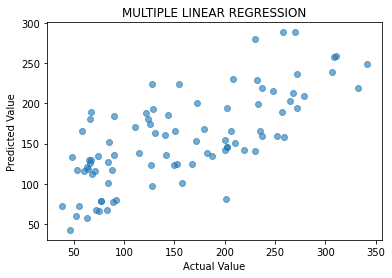

In [ ]:
from sklearn.linear_model import LinearRegression

mymodel = LinearRegression()
mymodel.fit(x_train, y_train)

y_predict = mymodel.predict(x_test)

import matplotlib.pyplot as plt

plt.scatter(y_test, y_predict, alpha=0.6)
plt.xlabel("Actual Value")
plt.ylabel("Predicted Value")
plt.title("MULTIPLE LINEAR REGRESSION")
plt.show()

In [ ]:
import statsmodels.api as sm
model = sm.OLS(y,x)
result = model.fit()
print(result.summary())

                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.106
Model:                            OLS   Adj. R-squared (uncentered):              0.085
Method:                 Least Squares   F-statistic:                              5.100
Date:                Mon, 18 Jul 2022   Prob (F-statistic):                    4.72e-07
Time:                        01:10:12   Log-Likelihood:                         -2873.9
No. Observations:                 442   AIC:                                      5768.
Df Residuals:                     432   BIC:                                      5809.
Df Model:                          10                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

R-squared : 결정계수. 전체 데이터 중 해당 회귀모델이 설명할 수 있는 데이터의 비율, 설명력을 나타낸다.(1에 가까울수록 성능이 좋음)

# 다중공선성(MultiColinearity)

**다중공선성**은 독립변수들 간에 강한 상관관계가 나타나서 회귀분석의 전제가정인 '독립변수들 간에 상관관계가 높으면 안된다'는 조건을 위배하는 경우를 의미합니다.

예를들어, '업무량' 과 '스트레스' 라는 두개의 독립변수를 가지고 '삶의 질'을 예측하는 회귀 분석을 할려고 한다면 두 변인이 일치에 가까울 정도로 관련성(상관관계)가 높아 문제가 발생할 수 있습니다.

다중공선성은 **분산팽창계수**(VIF, Variance Inflation Factor), **상태지수**(CI, Condition Index)등을 구하여 판단합니다.


**분산팽창계수**는 독립변수가 여러개 있을 때, 특정 독립변수를 종속변수로 삼고 나머지 독립변수들을 이용해 회귀분석을 수행하고 각 변수간의 관계성을 측정합니다.

보통 분산팽창계수가 10보다 높으면 다중공선성이 있다고 판단합니다. (엄밀한 판단이 필요한 경우 5)

**상태지수**는 10보다 높으면 다중공선성을 의심하고, 100보다 높으면 강한 다중공선성이 있다고 판단합니다.



In [ ]:
import seaborn as sns
from statsmodels.stats.outliers_influence import variance_inflation_factor

dataset = datasets.load_diabetes()

df = pd.DataFrame(dataset.data, columns=dataset.feature_names)

vif = pd.DataFrame()
vif['VIF Value'] = [variance_inflation_factor(df.values,i) for i in range(df.shape[1])]
vif['Features'] = df.columns
vif = vif.sort_values('VIF Value').reset_index(drop=True)
vif

,VIF Value,Features
0,1.217307,age
1,1.278073,sex
2,1.459429,bp
3,1.484623,s6
4,1.509446,bmi
5,8.890986,s4
6,10.076222,s5
7,15.402352,s3
8,39.194379,s2
9,59.203786,s1


# 다중공선성 해결방법

1.   ### 다중공선성 유발 변수 제거
2.   ### 주성분 분석(Principal Component Analysis, PCA)
3.   ### 능형 회귀분석(Ridge Regression) 

##1. 다중공선성 유발 변수 제거

단순하게 문제를 일으키는 변수를 제거합니다. 일반적으로 종속변수와의 상관 관계가 높은 것을 남겨둡니다.

상관 관계의 차이가 거의 없다면 해석이 용이한 설명변수를 남겨둡니다.

모델에 사용된 변수의 수가 적으면 제거하는 방법보다는 다른 방법을 사용하는것이 좋습니다.

##2. 주성분 분석(Principal Component Analysis, PCA)

주성분 분석은 서로 연관 가능성이 있는 고차원 공간의 변수들을 연관성이 없는 저차원 공간으로 변환(project)해주기 위한 분석입니다.

주성분 분석을 통해 나오는 주성분들은 그 순서대로 표본에 대한 설명력이 높습니다. 

이를 이용해 설명력이 높은 주성분들을 남겨두고 나머지들을 제거할 수 있습니다.

하지만 독립변수와 달리 새로 생성된 주성분에 대한 해석이 용이하지 않다는 단점이 존재합니다.

##3. 능형 회귀분석(Ridge Regression) 

기존의 회귀분석은 단순히 예측값과 실제값의 오차만을 최소화 했다면, 능형 회귀분석 축소법에서는 회귀계수의 제곱값들을 더한 값과 오차를 최소화 하여 회귀계수들을 0으로 수렴하게 끔 만듭니다.

회귀계수 앞에 붙은 파라미터 λ를 크게 정할수록 많은 회귀계수를 0으로 수렴시킵니다.

$$minimize  \quad \displaystyle λ\sum _{j=1}^{p}{β_j}^2 + error $$

In [ ]:
import seaborn as sns
from statsmodels.stats.outliers_influence import variance_inflation_factor

dataset = datasets.load_diabetes()

#가장 VIF가 높았던 변수 s1을 제거
df = pd.DataFrame(dataset.data, columns=dataset.feature_names)
df.drop(labels='s1',axis=1,inplace=True)

vif = pd.DataFrame()
vif['VIF Value'] = [variance_inflation_factor(df.values,i) for i in range(df.shape[1])]
vif['Features'] = df.columns
vif = vif.sort_values('VIF Value').reset_index(drop=True)
vif

,VIF Value,Features
0,1.216892,age
1,1.275050,sex
2,1.457415,bp
3,1.484410,s6
4,1.502327,bmi
5,2.172865,s5
6,2.926545,s2
7,3.736893,s3
8,7.818675,s4


In [ ]:
x = df.values
y = dataset.target.reshape(-1,1)

import statsmodels.api as sm
model = sm.OLS(y,x)
result = model.fit()
print(result.summary())

                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.105
Model:                            OLS   Adj. R-squared (uncentered):              0.086
Method:                 Least Squares   F-statistic:                              5.631
Date:                Mon, 18 Jul 2022   Prob (F-statistic):                    2.24e-07
Time:                        01:10:12   Log-Likelihood:                         -2874.1
No. Observations:                 442   AIC:                                      5766.
Df Residuals:                     433   BIC:                                      5803.
Df Model:                           9                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

#시계열 데이터

시계열 데이터는 일정한 시간 간격으로 순차적으로 기록된 관측 데이터입니다. 시계열 분석은 다양한 계열의 데이터를 분석(예측)하기 전에 수행하는 준비 단계입니다.

또한, 시계열 예측은 상업적으로 매우 중요합니다. 웹사이트 방문자수, 주가, 수요와 판매 등과 같이 비즈니스에 직결된 데이터가 주로 시계열 데이터입니다.

시계열 분석에서는 계열 데이터의 내재된 속성에 대해서 다양한 각도로 이해하는것이 필요합니다. 그리고 의미있고 정확한 예측을 하기 위해서 충분한 데이터를 확보하는 것이 필요합니다.

#시계열 데이터 로드 및 시각화

In [ ]:
from dateutil.parser import parse
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

plt.rcParams.update({'figure.figsize': (10, 7), 'figure.dpi': 120})
# 데이터를 읽어서 데이터프레임에 저장
df = pd.read_csv('https://raw.githubusercontent.com/selva86/datasets/master/a10.csv', parse_dates=['date'],index_col='date')
# 읽은 데이터 확인
df.head()

,value
date,
1991-07-01,3.526591
1991-08-01,3.180891
1991-09-01,3.252221
1991-10-01,3.611003
1991-11-01,3.565869


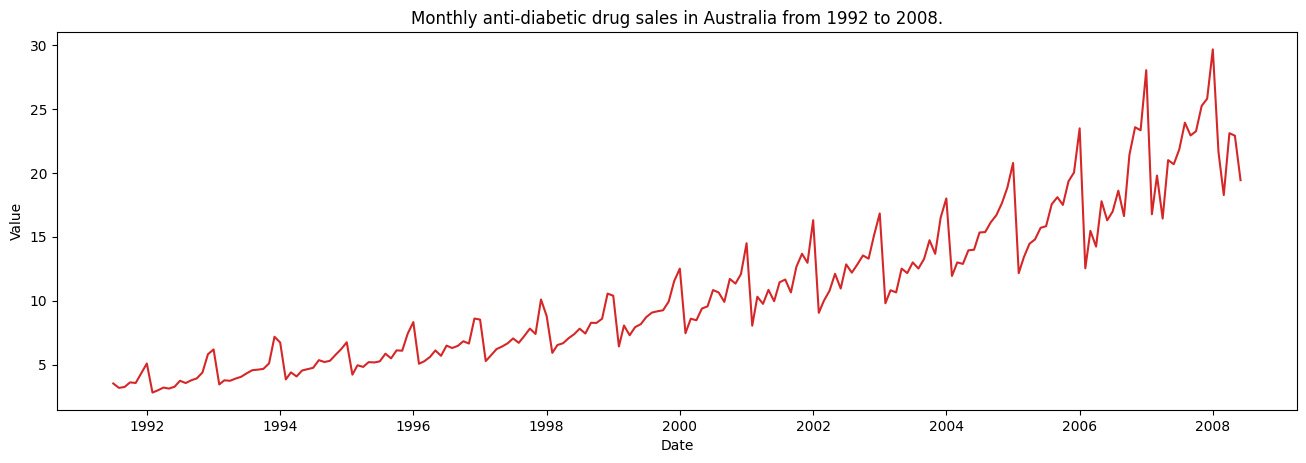

In [ ]:
def plot_df(df, x, y, title="", xlabel='Date', ylabel='Value', dpi=100):
    plt.figure(figsize=(16,5), dpi=dpi)
    plt.plot(x, y, color='tab:red')
    plt.gca().set(title=title, xlabel=xlabel, ylabel=ylabel)
    plt.show()

plot_df(df, x=df.index, y=df.value, title='Monthly anti-diabetic drug sales in Australia from 1992 to 2008.')

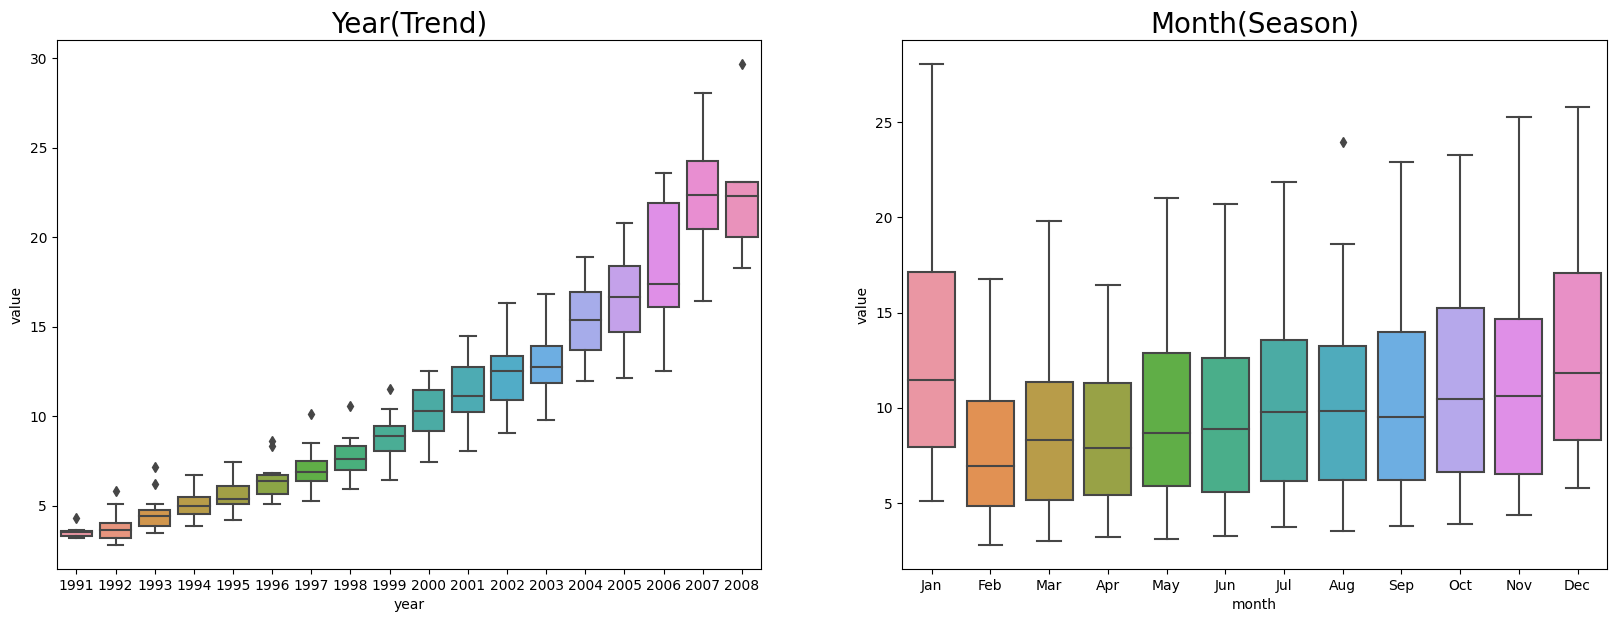

In [ ]:
# 도표 작성
fig, axes = plt.subplots(1, 2, figsize=(20,7), dpi= 100)
sns.boxplot(x='year', y='value', data=df, ax=axes[0])
sns.boxplot(x='month', y='value', data=df.loc[~df.year.isin([1991, 2008])], ax=axes[1])

 # 제목 설정
axes[0].set_title('Year(Trend)', fontsize=20)
axes[1].set_title('Month(Seasonal)', fontsize=20)
plt.show()

#시계열 데이터 분해

시계열 데이터에서 각각의 관측값은 구성요소들의 합 또는 곱으로 표현된다.

합 시계열 데이터 : 
값 = 기초레벨 + Trend + Seasonal + 에러(Residual)

곱 시계열 데이터 :
값 = 기초레벨 x Trend x Seasonal x 에러(Residual)


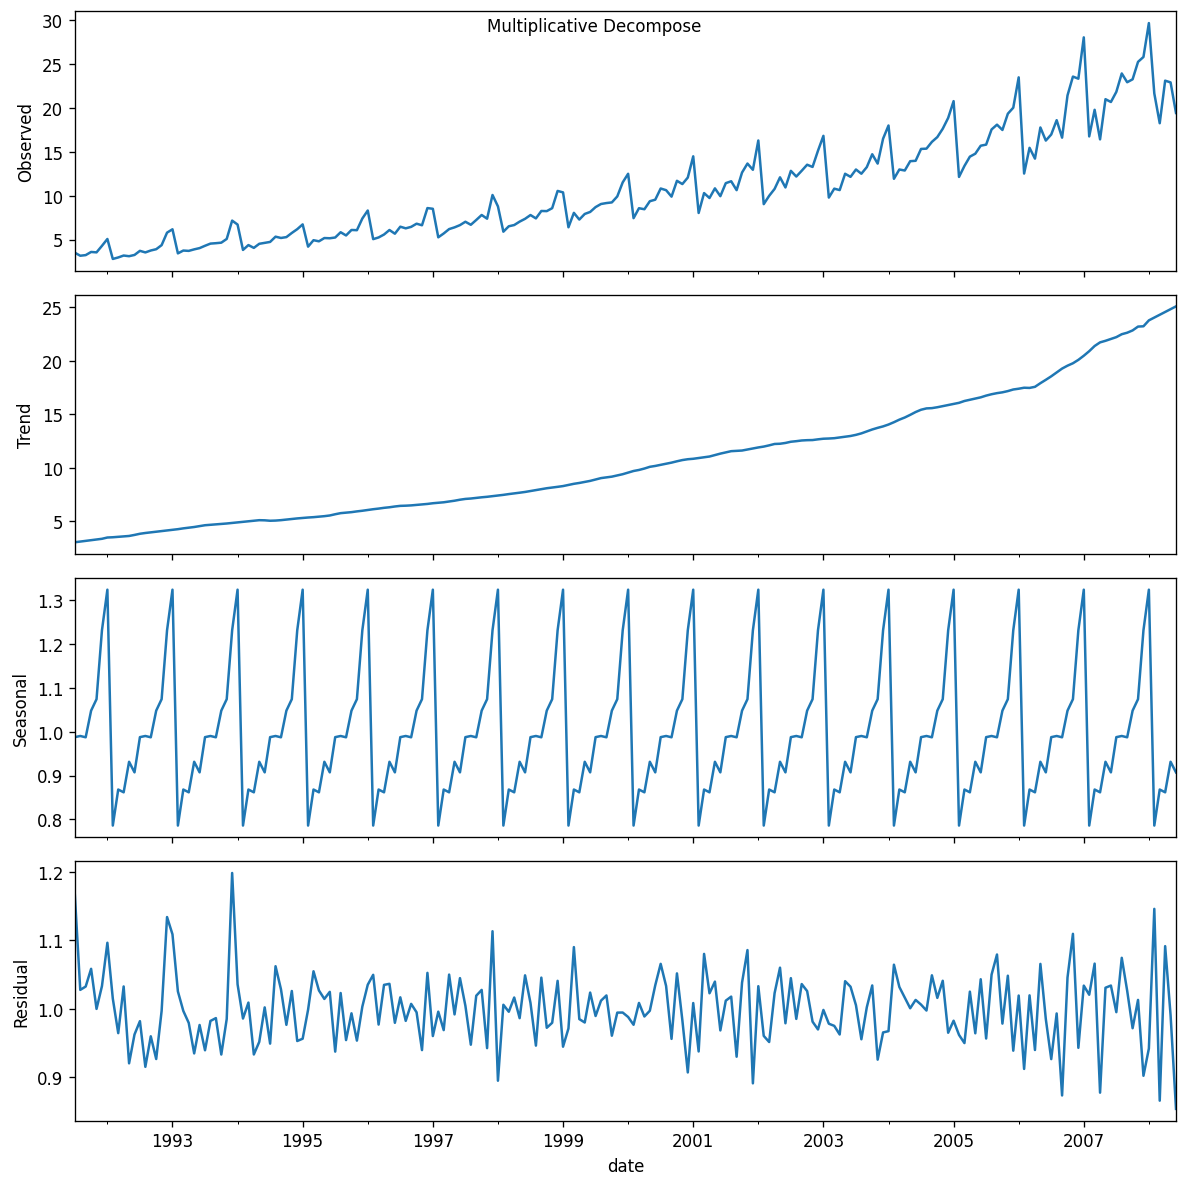

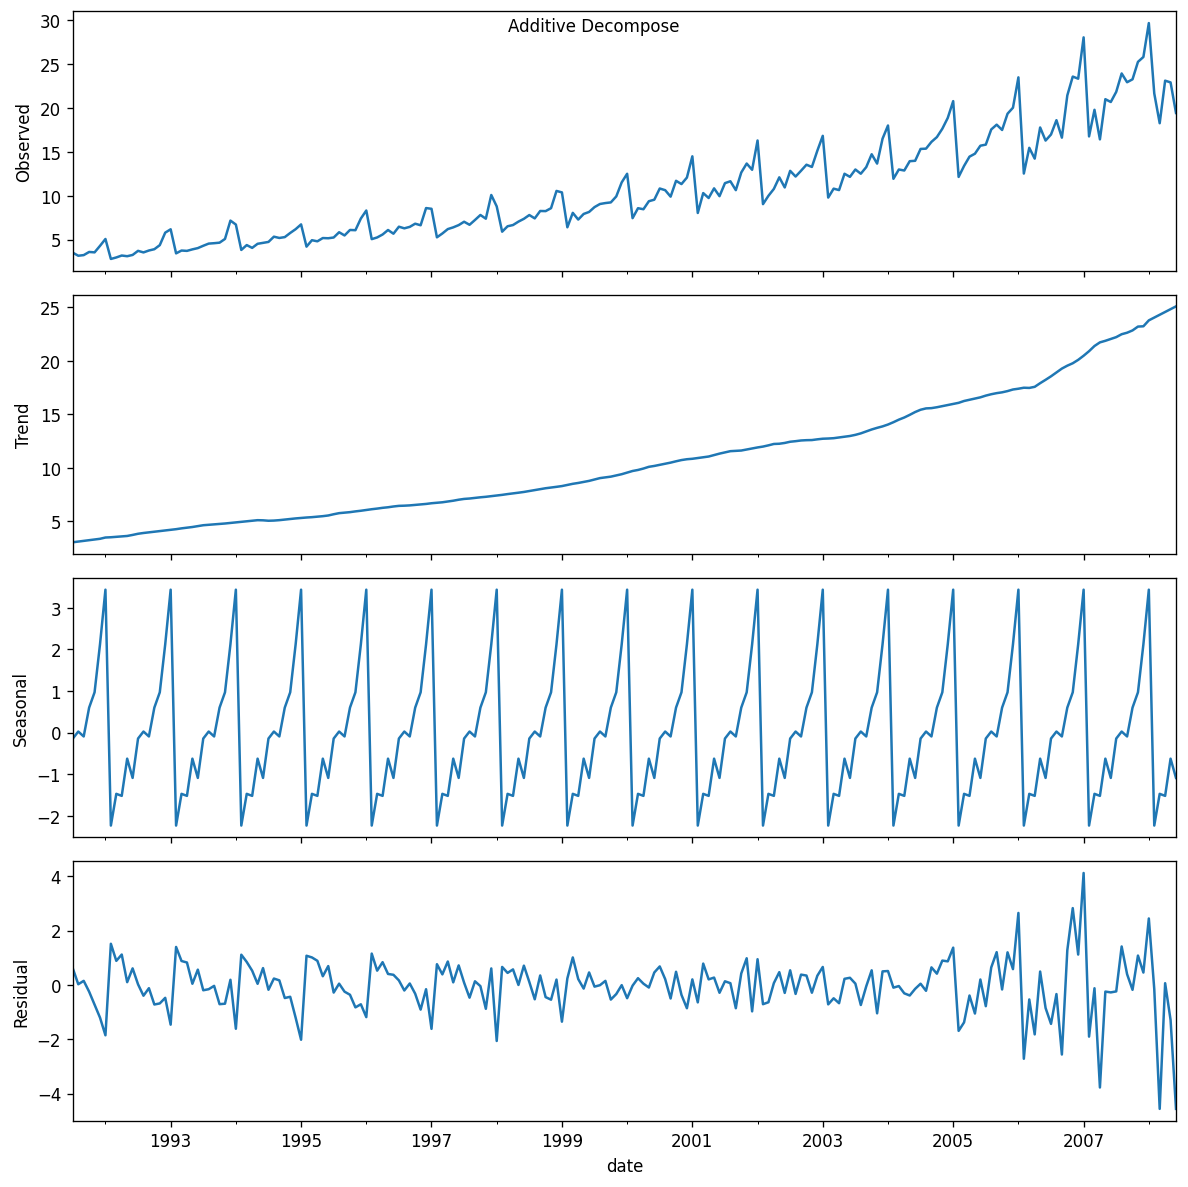

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose
from dateutil.parser import parse
 
# Import Data
df = pd.read_csv('https://raw.githubusercontent.com/selva86/datasets/master/a10.csv', parse_dates=['date'], index_col='date')
 
# 곱하기(승법적) 분해  
result_mul = seasonal_decompose(df['value'], model='multiplicative', extrapolate_trend='freq')
 
# 더하기(가법적) 분해 
result_add = seasonal_decompose(df['value'], model='additive', extrapolate_trend='freq')
 
# Plot
plt.rcParams.update({'figure.figsize': (10,10)})
result_mul.plot().suptitle('Multiplicative Decompose', fontsize=10)
result_add.plot().suptitle('Additive Decompose', fontsize=10)
plt.show()